In [82]:
import numpy as np
import netCDF4 as ncdf
import matplotlib.pyplot as plt
from netCDF4 import num2date


### Definition of regions and filename

In [83]:
lon1_nino34=190; lon2_nino34=240; lat1_nino34=-5; lat2_nino34=5
lon1_nino3 =210; lon2_nino3 =270; lat1_nino3 =-5; lat2_nino3 =5
lon1_nino4 =160; lon2_nino4 =210; lat1_nino4 =-5; lat2_nino4 =5  # 追加
lon1_eq    =120; lon2_eq    =300; lat1_eq    =-2; lat2_eq    =2
fname_ocn="../OUTPUTS/CGCM/avg_cgcm_full_eqpac_ocn_clm_H120_cd1.7_dt3600_c10day.nc";fflag="clm_H120_cd1.7_dt3600"
#fname_ocn="../OUTPUTS/CGCM/avg_cgcm_full_eqpac_ocn_ann_H120_cd1.7_dt3600_c10day.nc";fflag="ann_H120_cd1.7_dt3600"
out_form="X11"
out_form="png"

In [84]:
nc_ocn = ncdf.Dataset(fname_ocn, "r")
lon_ocn = nc_ocn.variables["lon_p"][:]
lat_ocn = nc_ocn.variables["lat_p"][:]

time_var = nc_ocn.variables["time"]

time = time_var[:]  # numeric time
time_units = getattr(time_var, "units", None)
time_cal   = getattr(time_var, "calendar", "standard")
time_dt = num2date(
    time,
    units=time_units,
    calendar=time_cal,
    only_use_cftime_datetimes=False,
    only_use_python_datetimes=True)

# index
ilon_nino34 = np.where((lon_ocn>=lon1_nino34)&(lon_ocn<=lon2_nino34))[0]
ilat_nino34 = np.where((lat_ocn>=lat1_nino34)&(lat_ocn<=lat2_nino34))[0]

ilon_nino3  = np.where((lon_ocn>=lon1_nino3 )&(lon_ocn<=lon2_nino3 ))[0]
ilat_nino3  = np.where((lat_ocn>=lat1_nino3 )&(lat_ocn<=lat2_nino3 ))[0]

ilon_nino4  = np.where((lon_ocn>=lon1_nino4 )&(lon_ocn<=lon2_nino4 ))[0]
ilat_nino4  = np.where((lat_ocn>=lat1_nino4 )&(lat_ocn<=lat2_nino4 ))[0]

ilon_eq     = np.where((lon_ocn>=lon1_eq   )&(lon_ocn<=lon2_eq   ))[0]
ilat_eq     = np.where((lat_ocn>=lat1_eq   )&(lat_ocn<=lat2_eq   ))[0]

# data
sst_nino34 = nc_ocn.variables["ssta"][:, ilat_nino34, ilon_nino34]
sst_nino3  = nc_ocn.variables["ssta"][:, ilat_nino3 , ilon_nino3 ]
sst_nino4  = nc_ocn.variables["ssta"][:, ilat_nino4 , ilon_nino4 ]
sst_eq     = nc_ocn.variables["ssta"][:, ilat_eq    , ilon_eq    ]
h_eq       = nc_ocn.variables["h_ocn_sw"][:, ilat_eq, ilon_eq]
nc_ocn.close()

### plot results

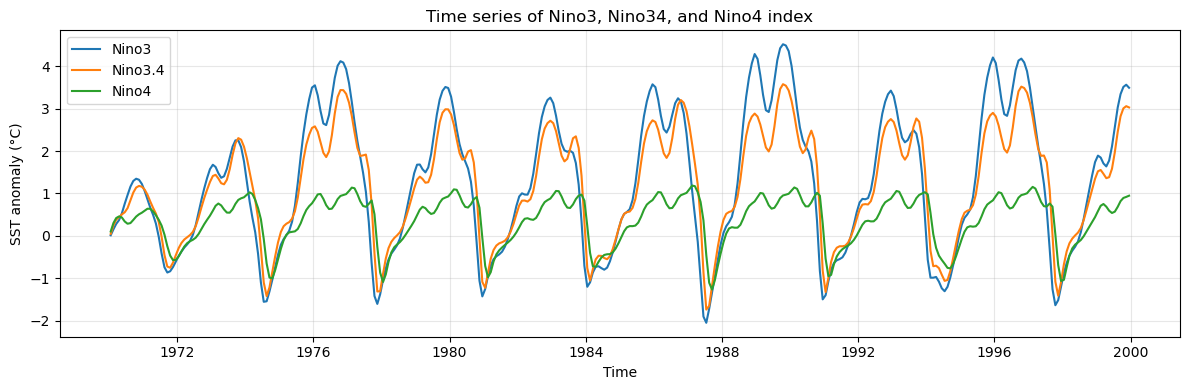

In [85]:
nino34 = np.nanmean(sst_nino34, axis=(1,2))
nino3  = np.nanmean(sst_nino3 , axis=(1,2))
nino4  = np.nanmean(sst_nino4 , axis=(1,2))
plt.figure(figsize=(12,4))
plt.plot(time_dt, nino3,  label="Nino3")
plt.plot(time_dt, nino34, label="Nino3.4")
plt.plot(time_dt, nino4,  label="Nino4")

plt.title("Time series of Nino3, Nino34, and Nino4 index")
plt.xlabel("Time")
plt.ylabel("SST anomaly (°C)")  # ssta の単位に合わせて必要なら調整
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
figname="figure_series_nino_"+fflag+".png"
if (out_form=="X11"):
    plt.show()
else:
    plt.savefig(figname)

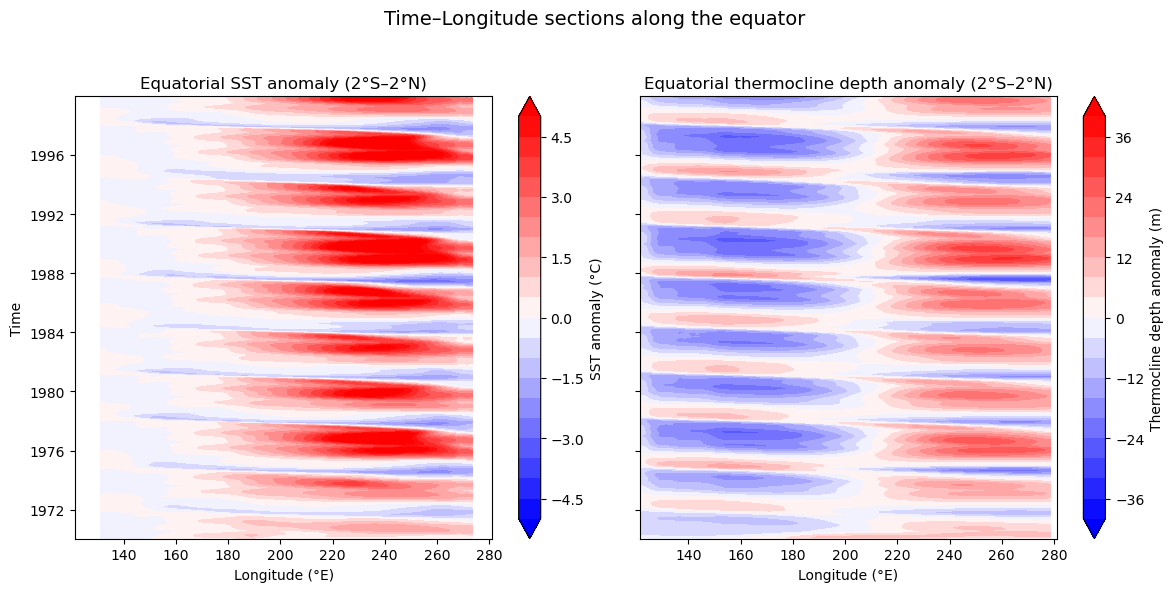

In [86]:
figure = plt.figure(figsize=(12,6))

# contour levels
clevs_sst = np.linspace(-5, 5, 21)
clevs_h   = np.linspace(-40, 40, 21)

# mesh
x, y = np.meshgrid(lon_ocn[ilon_eq], time_dt)

# ==========================
# (a) Equatorial SST anomaly
# ==========================
ax1 = plt.subplot(1, 2, 1)
cs1 = ax1.contourf(
    x, y,
    np.nanmean(sst_eq, axis=1),
    cmap="bwr",
    levels=clevs_sst,
    extend="both"
)
cbar1 = plt.colorbar(cs1, ax=ax1)
cbar1.set_label("SST anomaly (°C)")

ax1.set_title("Equatorial SST anomaly (2°S–2°N)")
ax1.set_xlabel("Longitude (°E)")
ax1.set_ylabel("Time")

# ==========================
# (b) Equatorial thermocline depth
# ==========================
ax2 = plt.subplot(1, 2, 2)
cs2 = ax2.contourf(
    x, y,
    np.nanmean(h_eq, axis=1),
    cmap="bwr",
    levels=clevs_h,
    extend="both"
)
cbar2 = plt.colorbar(cs2, ax=ax2)
cbar2.set_label("Thermocline depth anomaly (m)")

ax2.set_title("Equatorial thermocline depth anomaly (2°S–2°N)")
ax2.set_xlabel("Longitude (°E)")
ax2.set_yticklabels([])   # 左パネルと共有なので非表示

# ==========================
# figure settings
# ==========================
figure.suptitle(
    "Time–Longitude sections along the equator",
    fontsize=14
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
figname="figure_eqsec_nino_"+fflag+".png"
if (out_form=="X11"):
    plt.show()
else:
    plt.savefig(figname)